# Linear regression exercises

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 0. Simulate phone dataset (*)
a

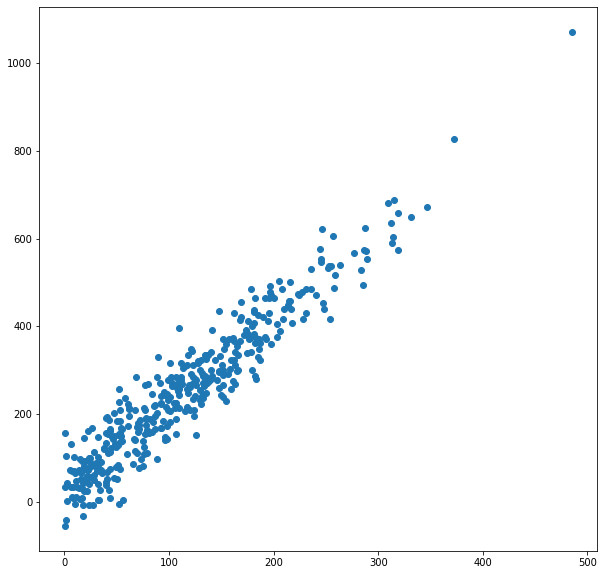

In [151]:

np.random.seed(42)
size = (400, 1)

μ, σ = 100, 100
X =np.abs(np.random.normal(μ, σ, size))

μ_ϵ, σ_ϵ = 0, 50
ϵ = np.random.normal(μ_ϵ, σ_ϵ, size)
y = 2 * X + 25 + ϵ
plt.figure(figsize=(10, 10))
plt.scatter(X, y);

b

In [143]:
xy = np.append(X, y, 1)

xy = np.delete(xy, np.where(xy[:, 1]<0)[0], 0)
xy = np.delete(xy, np.where(xy[:, 0]>=300)[0], 0)


xy.shape

(381, 2)

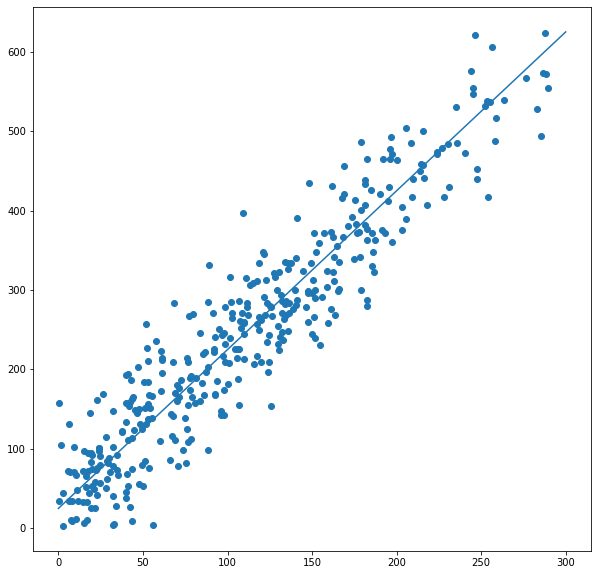

In [150]:
plt.figure(figsize=(10, 10))
plt.scatter(xy[:, 0],xy[:, 1])

x_linje = np.linspace(0, 300)
y_linje = 2 * x + 25
plt.plot(x_linje, y_linje);

In [145]:
df =pd.DataFrame(xy, columns=("Minuter", "Kostnad"))
df.head()

,Minuter,Kostnad
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1. Train|test split (*)
a


In [178]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = .7, random_state = 42, replace = False) -> tuple:
    X, y = pd.DataFrame(X), pd.DataFrame(y)
    
    n = int(len(df) * train_fraction)
    
    X.insert(0, "intercept", 1)
   
    X_train = X.sample(n=n, random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)
    
    y_train = y.sample(n=n, random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)
   
    return (X_train, X_test, y_train, y_test)

In [179]:
(X_train, X_test, y_train, y_test) = train_test_split(df["Minuter"], df["Kostnad"] )

In [180]:
# Dubletter
X_train.index.isin(X_test.index).sum(), y_train.index.isin(y_test.index).sum() 

(0, 0)

In [181]:
# Saknade index
len(xy), len(X_train), len(X_test)


(381, 266, 115)

## 2. Simple linear regression with normal equation (*)

In [185]:
X_t, y_t = X_train.to_numpy(), y_train.to_numpy()

β_hat = np.linalg.inv(X_t.T @ X_t) @ X_t.T @ y_t
β_hat

array([[32.22147722],
       [ 1.91050591]])

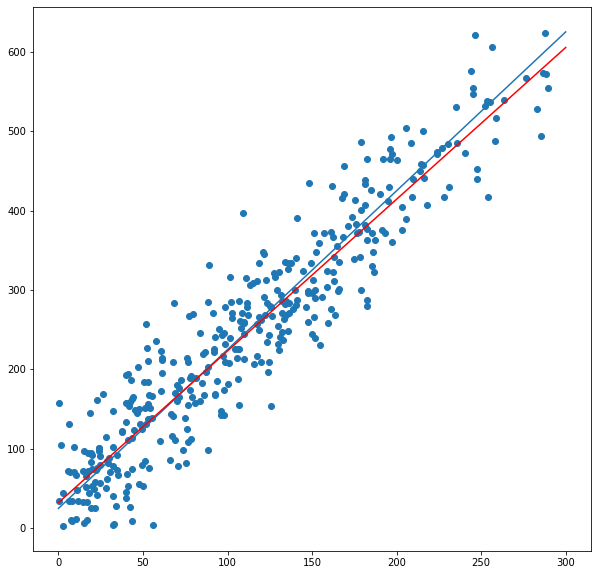

In [225]:
y_hat = np.append((1+0*x_linje.reshape(50,1)), x_linje.reshape(50,1), 1) @ β_hat

plt.figure(figsize=(10, 10))
plt.scatter(xy[:, 0],xy[:, 1])
plt.plot(x_linje, y_linje)
plt.plot(x_linje, y_hat, "r");

